In [2]:
# Dependencies
from bs4 import BeautifulSoup as bs
import requests
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
# define url and browse
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [5]:
# find articles and loop through

html = browser.html
soup = bs(html, 'html.parser')

rows = soup.find_all('tr', class_='data-row')


In [6]:
# Obtain information from tag <table>
mars_data = []

for x in rows:
    td = x.find_all('td')
    row = [col.text for col in td]
    mars_data.append(row)


In [7]:
mars_data


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
df = pd.DataFrame(mars_data, columns=['id', 'terrestrial_date', 'sol', 'ls','month','min_temp','pressure'])
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
browser.quit

<bound method BaseWebDriver.quit of <splinter.driver.webdriver.chrome.WebDriver object at 0x00000272AB78CB48>>

In [10]:
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
df = df.astype({'id': 'int', 
            'terrestrial_date': 'datetime64',
            'sol': 'int',
            'ls': 'int',
            'month': 'int',
            'min_temp': 'float',
            'pressure': 'float'})
df.dtypes



id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
# 1. How many months exist on Mars?

months_mars = df['month'].nunique()

print('There are:',months_mars,'in Mars.')

There are: 12 in Mars.


In [14]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?

martian_days = df['sol'].nunique()

print('There are',martian_days,'Martian days in the dataset scarped. ')

There are 1867 Martian days in the dataset scarped. 


In [15]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
# Find the average the minimum daily temperature for all of the months.

month_group = df.groupby(["month"]).mean()
# month_group

coldest_month = month_group['min_temp'].min()
hottest_month = month_group['min_temp'].max()
print('COLDEST MONTH TEMP:',coldest_month, '°C')
print('HOTTEST MONTH TEMP:',hottest_month, '°C')


COLDEST MONTH TEMP: -83.30729166666667 °C
HOTTEST MONTH TEMP: -68.38297872340425 °C


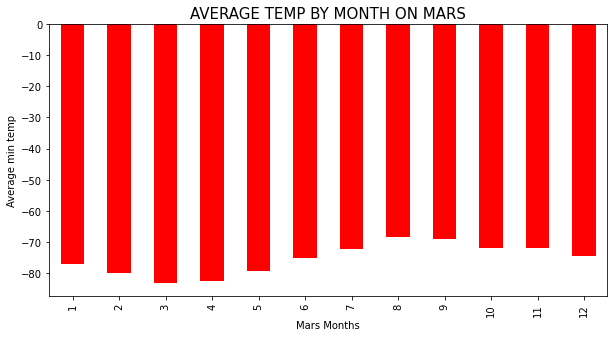

The coldest month in Mars is 3 with an average temperature of -83.30729166666667 °C
The hottest month in Mars is 8 with an average temperature of -68.38297872340425 °C


<Figure size 432x288 with 0 Axes>

In [16]:
# Plot the results as a bar chart.
avg_temp = month_group[['min_temp']]
avg_temp.plot(kind="bar",color='red', figsize=(10, 5), legend = False)

plt.title(('AVERAGE TEMP BY MONTH ON MARS'),fontsize=15)
plt.ylabel('Average min temp')
plt.xlabel('Mars Months')
plt.show()
plt.tight_layout()

print( 'The coldest month in Mars is 3 with an average temperature of',coldest_month,'°C')
print( 'The hottest month in Mars is 8 with an average temperature of',hottest_month,'°C')

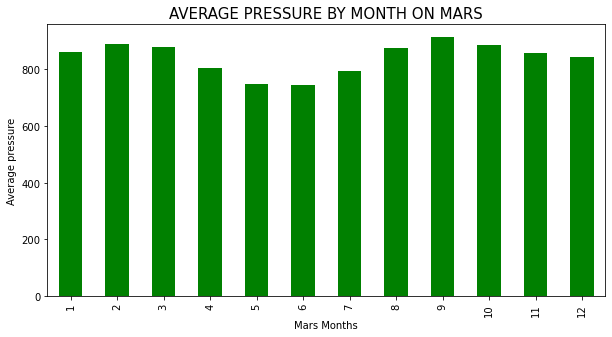

The min pressure month in Mars is 6 with an average pressure of pressure    745.054422
dtype: float64
The max pressure month in Mars is 9 with an average pressure of pressure    913.30597
dtype: float64


<Figure size 432x288 with 0 Axes>

In [17]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars?

# Plot the results as a bar chart.
avg_pressure = month_group[['pressure']]
avg_pressure.plot(kind="bar",color='green', figsize=(10, 5), legend = False)

min_pressure = avg_pressure.min()
max_pressure = avg_pressure.max()

plt.title(('AVERAGE PRESSURE BY MONTH ON MARS'),fontsize=15)
plt.ylabel('Average pressure')
plt.xlabel('Mars Months')
plt.show()
plt.tight_layout()

print( 'The min pressure month in Mars is 6 with an average pressure of',min_pressure,)
print( 'The max pressure month in Mars is 9 with an average pressure of' ,max_pressure,)

In [18]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


The earth days the study recorded were 2021 days 00:00:00


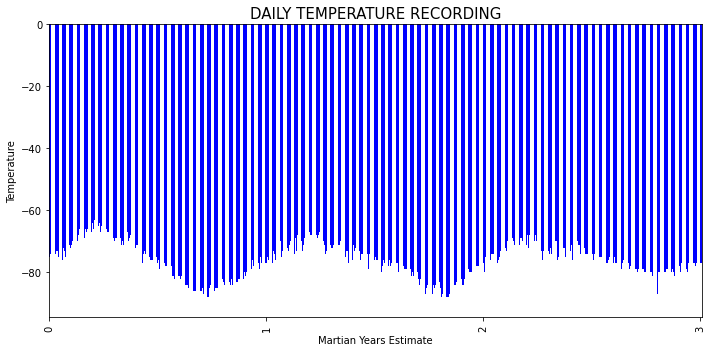

In [19]:
# 5.About how many terrestrial (Earth) days exist in a Martian year? 
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
start_date = df['terrestrial_date'].min()
end_date = df['terrestrial_date'].max()
earth_days_count = end_date-start_date
print(f'The earth days the study recorded were {earth_days_count}')
# Visually estimate the result by plotting the daily minimum temperature.

daily_min_temp = df['min_temp']

daily_min_temp.plot(kind='bar',color='blue', figsize=(10, 5))

plt.title(('DAILY TEMPERATURE RECORDING'),fontsize=15)
plt.ylabel('Temperature')
plt.xlabel('Martian Years Estimate')
plt.locator_params(axis='x', nbins= 3.01)
plt.tight_layout()

In [20]:
# By analasing the daily temperature graph we can visualise 3 cycles, therefore:

earth_days_in_mars_year = earth_days_count/3 
print(f'There is approximately {earth_days_in_mars_year} terrestrial days in a Martian Year')

There is approximately 673 days 16:00:00 terrestrial days in a Martian Year


In [24]:
# Export to csv

df.to_csv('./data/Mars_data.csv')

In [ ]:
# Finito